In [42]:
print("hello")

hello


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
df = pd.read_csv('/Users/monika.khanchandani/Downloads/train.csv')

In [45]:
##print(df.head())
print(df.columns)
print(df.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [46]:
## To figure out null values in each column
#features_with_na = [...]: This line initializes an empty list called features_with_na to store the column names with missing values.
#for features in df.columns: This line starts a loop that iterates over each column name (features) in the dataframe's columns.
#if df[features].isnull().sum() > 1: This line checks if the current column (features) has more than one missing value. df[features] selects the column from the dataframe, and .isnull() returns a boolean mask indicating which values are missing. .sum() is then used to count the number of missing values in that column.
#features for features in df.columns: This line appends the column name (features) to the features_with_na list if the condition in the previous line is true. It effectively filters and selects only the column names that have more than one missing value.
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

In [47]:
#Now we have a df which is basically rows and columns like a tabular format
#Now we want to figure out how many Null values are present in each columm
#step 1 make the list of features that has missing value
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

##now features_with_na has all the columns which has >1 null values
#now we want to figure out %age null values in each column
for f in features_with_na:
    print(f,np.round(df[f].isnull().mean(),4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.5973
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


In [48]:
print(features_with_na)
print(len(features_with_na))  ##since features_with_na is a list so we are figuring out length and not shape

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
18


In [49]:
#feature represents the current column name being processed in the loop.
#feature represents the current column name being processed in the loop.
#df[feature] selects the column from the dataframe.
# .isnull() returns a boolean mask indicating which values in the selected column are missing.
#.mean() calculates the average of the boolean mask, treating True as 1 and False as 0. This effectively gives the proportion of missing values in the column.
#np.round(..., 4) rounds the result to 4 decimal places using the np.round function from the NumPy library.
#' % missing values' is a string that is concatenated to the output to provide additional context.

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.5973  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


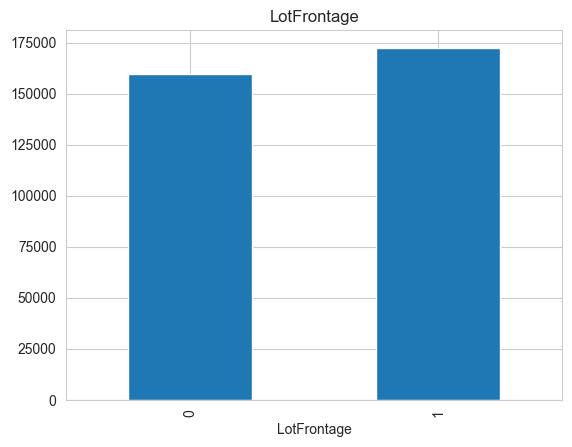

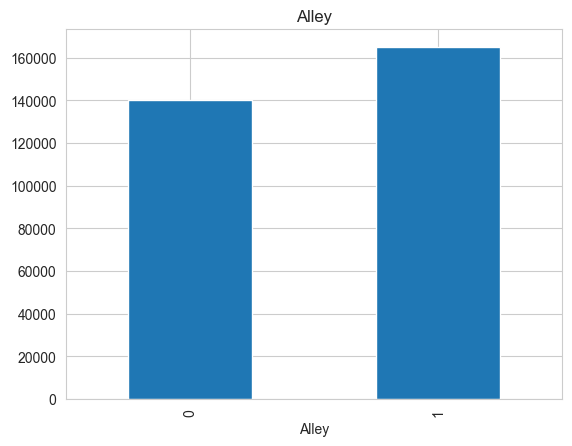

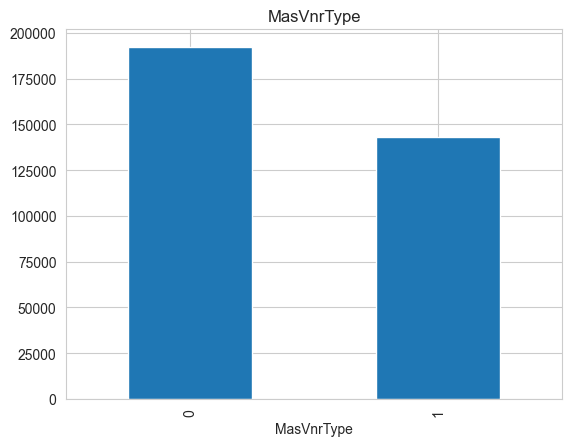

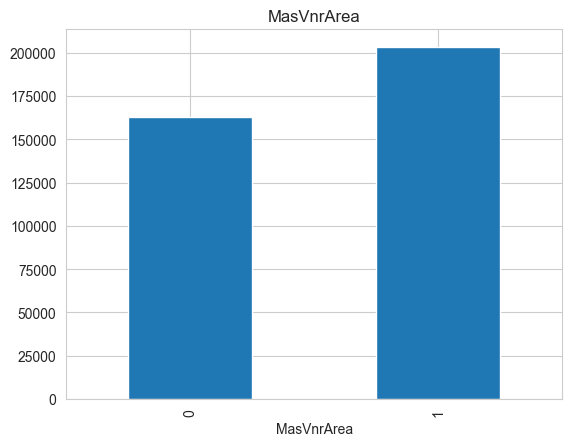

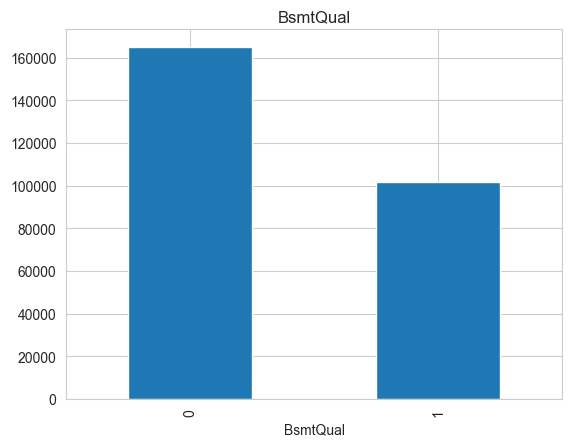

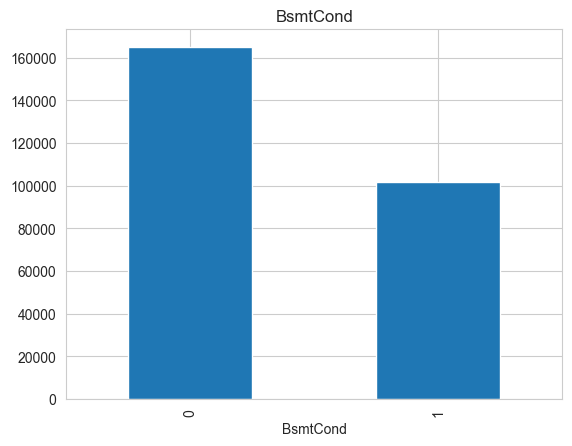

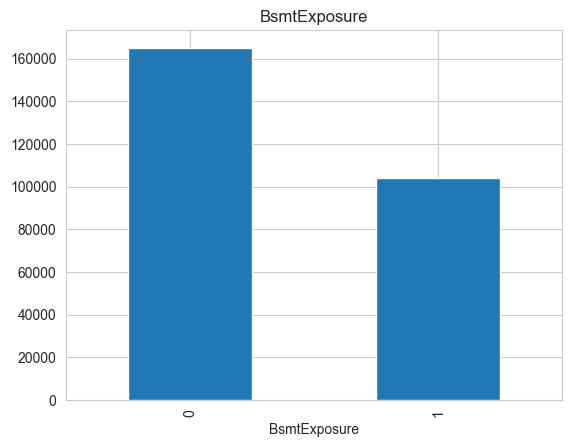

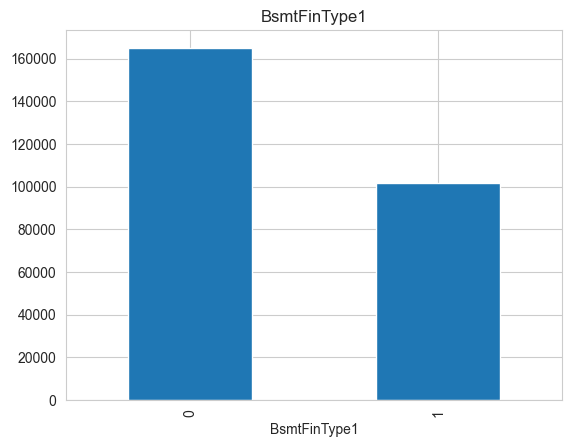

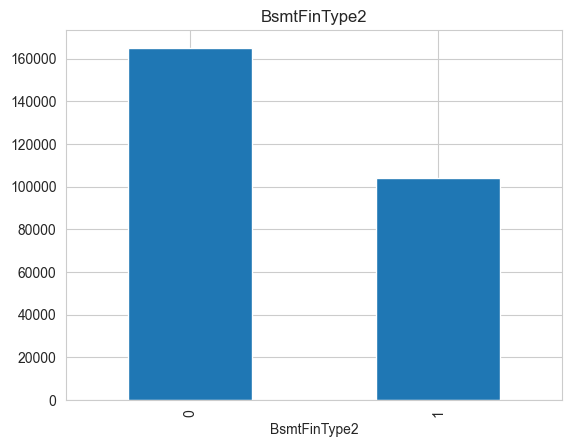

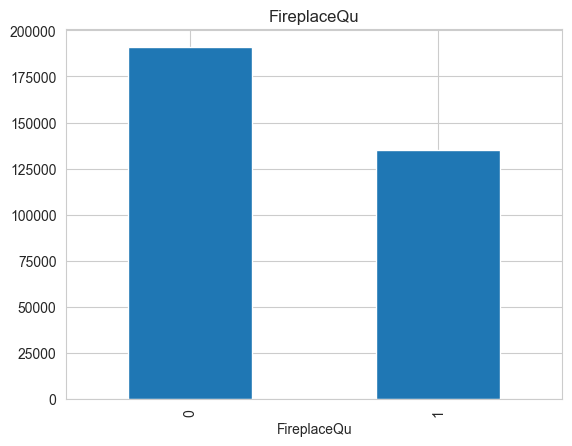

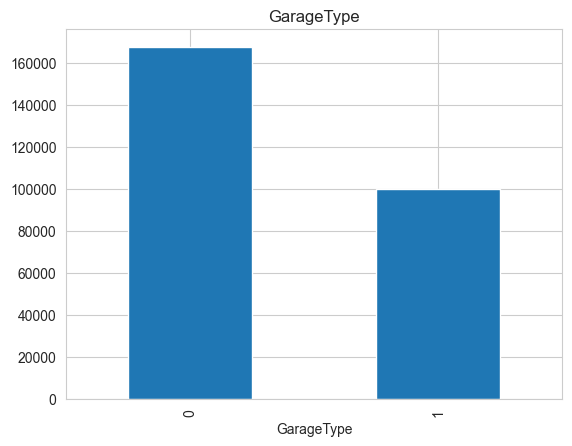

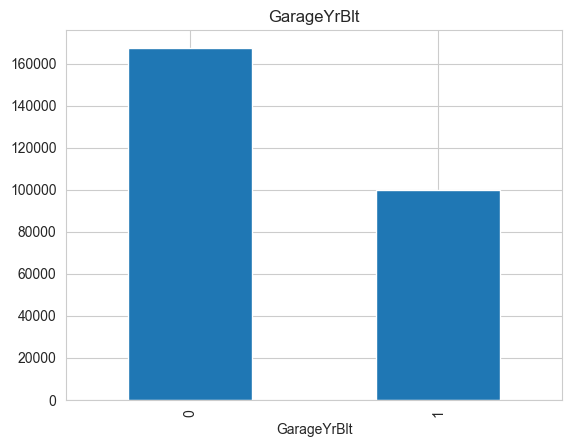

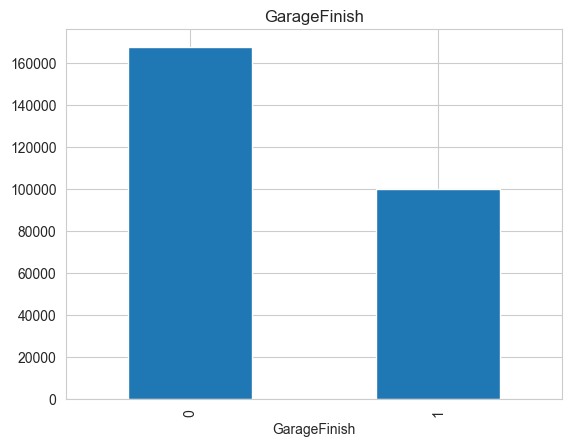

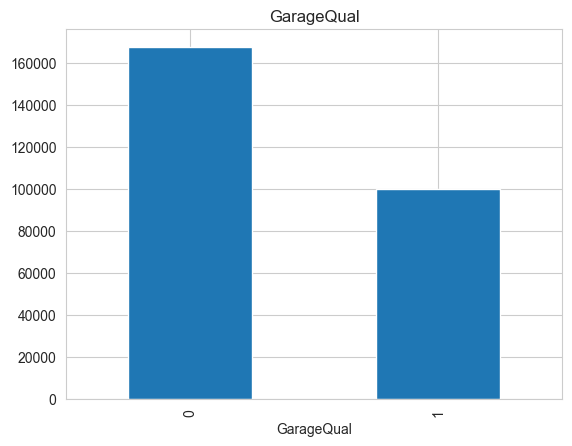

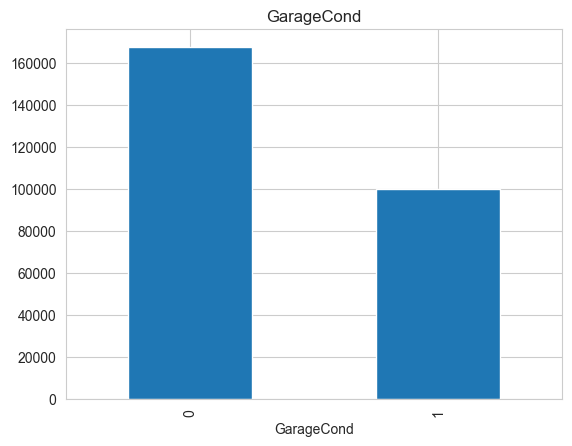

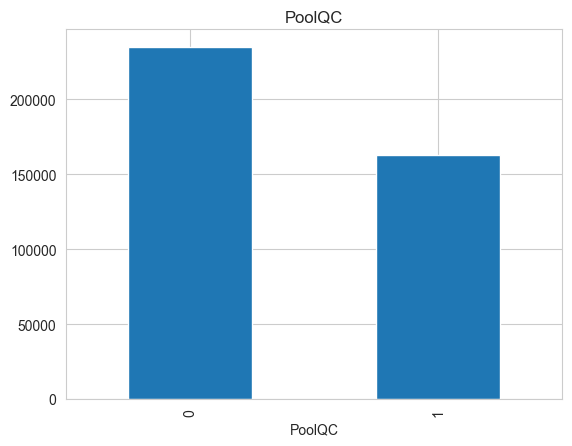

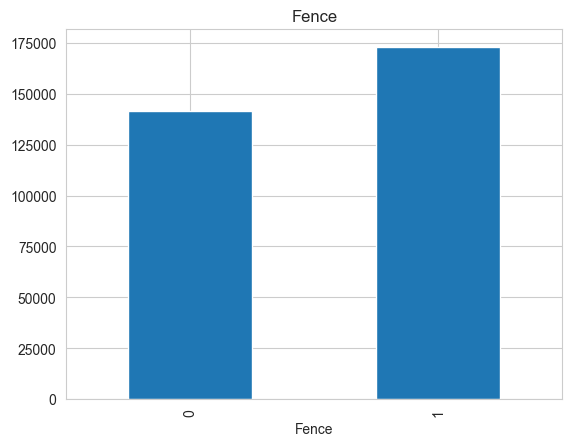

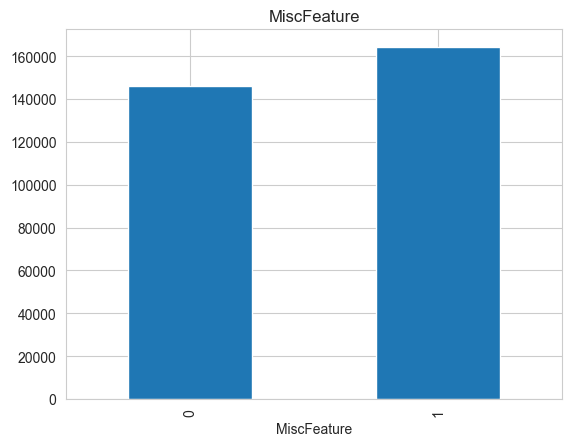

In [50]:
###Since they are many missing values, we need to find the relationship between missing values and Sales Price

for f in features_with_na:
    data=df.copy()
    data[f]=np.where(data[f].isnull(),1,0)

    data.groupby(f)['SalePrice'].median().plot.bar()  ##sales price group by null/non null values, figuring out median for sales price where the values are null and vise versa
    plt.title(f)
    plt.show()

In [51]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [52]:
#Data Analysis Phase part-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
##Display all the column of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [54]:
dataset=pd.read_csv('/Users/monika.khanchandani/Downloads/train.csv')

In [55]:
print(dataset.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [56]:
print(dataset.shape)

(1460, 81)


In [57]:
 ##figuring out missing value
##this will store columns which has >1 nan values
dataset_with_nan=[features for features in dataset.columns if dataset[features].isnull().sum()>1 ]
for f in dataset_with_nan:
    print(f,np.round(dataset[f].isnull().mean() ,4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


In [58]:
for f in features_with_na:
    data=dataset.copy()
      ###what happens when this is not in the loop???
    data[f]=np.where(data[f].isnull(),1,0)

    data.groupby(f)['SalePrice'].median().plot.bar()
    plt.title(f)
    plt.show()


KeyboardInterrupt



In [ ]:
print(dataset.head())

In [62]:
## Figuring out lis of  Numerical Values
numerical_features=[features for features in dataset.columns if dataset[features].dtypes!='O']
print(numerical_features)   ##list of columns with numerical values
print(len(numerical_features))   ##total 38 columns have numerical values


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38


In [66]:
###Temporal Variables
year_feature=[f for f in numerical_features if 'Yr' in f or 'Year' in f]   ##numerical feature is a list not a df
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']